# Import the Fashion MNIST dataset

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

W0804 00:26:06.932066  2980 __init__.py:687] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


1.15.0-dev20190803


In [83]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data

In [84]:
train_images.shape

(60000, 28, 28)

In [85]:
len(train_labels)

60000

In [86]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [87]:
test_images.shape

(10000, 28, 28)

In [88]:
len(test_labels)

10000

# Preprocess the data

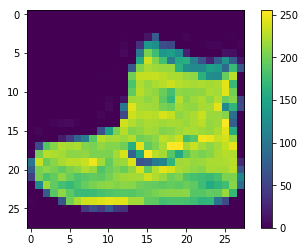

In [89]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [90]:
train_images = train_images / 255.0

test_images = test_images / 255.0

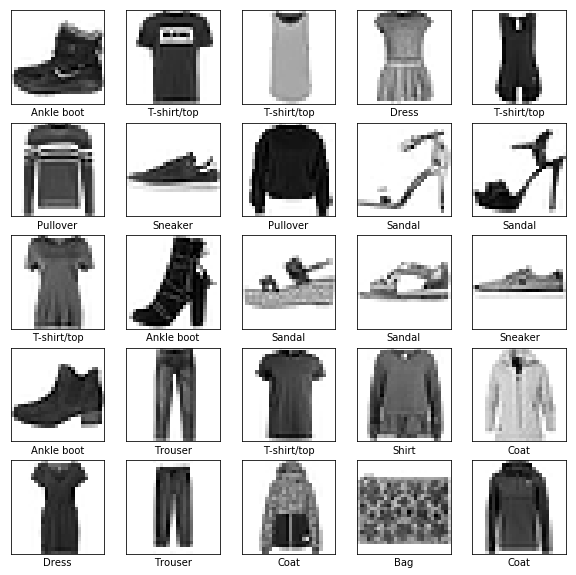

In [91]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model
## Building the neural network requires configuring the layers of the model, then compiling the model.

# Setup the layers

In [92]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model

In [93]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [94]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.4972 - acc: 0.8237
Epoch 2/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3782 - acc: 0.8633
Epoch 3/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.3408 - acc: 0.8752
Epoch 4/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3159 - acc: 0.8842
Epoch 5/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2966 - acc: 0.8907


# Evaluate accuracy

In [95]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.3467 - acc: 0.8745
Test accuracy: 0.8745


# Make predictions

In [96]:
predictions = model.predict(test_images)

In [97]:

predictions[0]

array([2.2953695e-07, 5.2126463e-08, 8.8906006e-08, 1.7609115e-07,
       6.1348882e-09, 6.7482172e-03, 5.3634568e-07, 3.2896012e-02,
       2.4938254e-05, 9.6032971e-01], dtype=float32)

In [98]:
np.argmax(predictions[0])

9

In [99]:
test_labels[0]

9

In [100]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

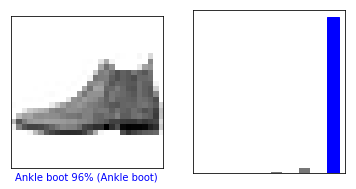

In [101]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

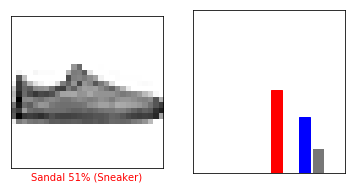

In [102]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

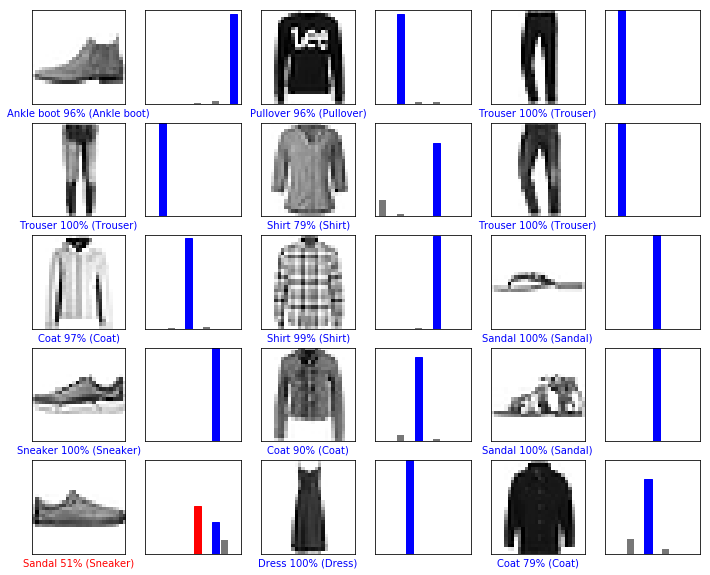

In [103]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [104]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [105]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [106]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.2953651e-07 5.2126463e-08 8.8906006e-08 1.7609096e-07 6.1348882e-09
  6.7482144e-03 5.3634568e-07 3.2895997e-02 2.4938230e-05 9.6032971e-01]]


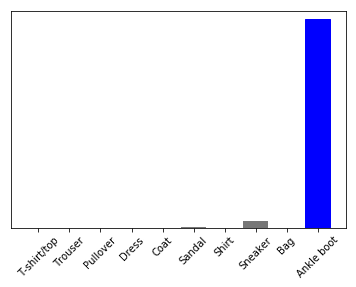

In [107]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [108]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
